In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 5]

In [4]:
df = pd.read_csv('D:/project/insurance.csv')
df.head()

,age,bmi,children,sex,smoker,region,charges
0,37,47.600000,2,female,yes,southwest,46113.51100
1,58,25.175000,0,male,no,northeast,11931.12525
2,39,23.870000,5,female,no,southeast,8582.30230
3,18,31.350000,4,female,no,northeast,4561.18850
4,36,27.546725,3,male,no,northeast,6746.76374


In [5]:
df.shape

(6000, 7)

In [6]:
df.isnull().sum()

age         0
bmi         0
children    0
sex         0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6000 non-null   int64  
 1   bmi       6000 non-null   float64
 2   children  6000 non-null   int64  
 3   sex       6000 non-null   object 
 4   smoker    6000 non-null   object 
 5   region    6000 non-null   object 
 6   charges   6000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 328.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,6000.000000,6000.000000,6000.00000,6000.000000
mean,39.045167,30.694076,1.10150,13374.485040
std,14.083673,6.102123,1.20531,12299.762118
min,18.000000,15.946461,0.00000,1121.869234
25%,26.000000,26.290000,0.00000,4562.427980
50%,39.000000,30.391358,1.00000,9388.750310
75%,51.000000,34.678437,2.00000,17352.670490
max,64.000000,53.137887,5.00000,63770.438390


In [9]:
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns

In [10]:
cat_features.values

array(['sex', 'smoker', 'region'], dtype=object)

In [11]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [12]:
for i in cat_features:
    print(df[i].value_counts())
    print('\n'+'-'*50)

sex
male      3019
female    2981
Name: count, dtype: int64

--------------------------------------------------
smoker
no     4735
yes    1265
Name: count, dtype: int64

--------------------------------------------------
region
southeast    1638
southwest    1502
northeast    1440
northwest    1420
Name: count, dtype: int64

--------------------------------------------------


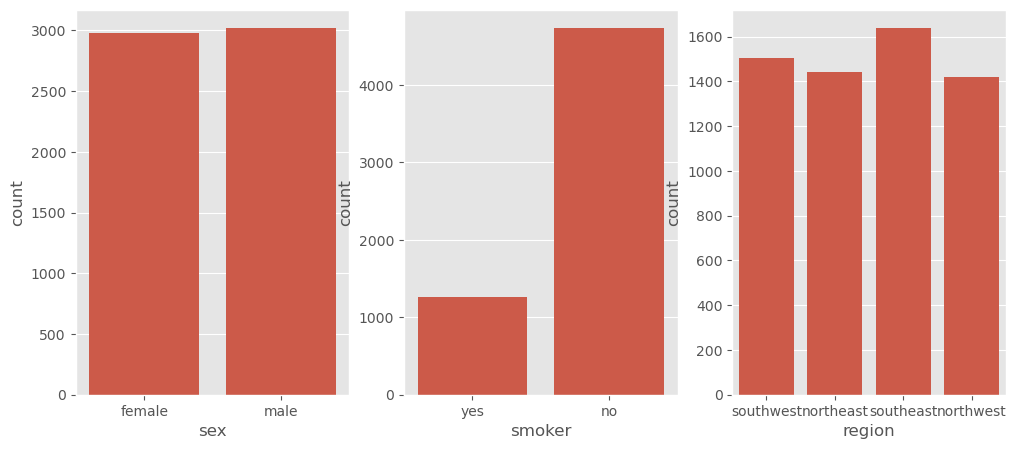

In [13]:
fig, ax = plt.subplots(nrows= int(np.ceil(len(cat_features) / 3)), ncols = 3)
ax = ax.flatten()
for i, column in enumerate(cat_features):
    sns.countplot(df, x = df[column], ax = ax[i])

In [14]:
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

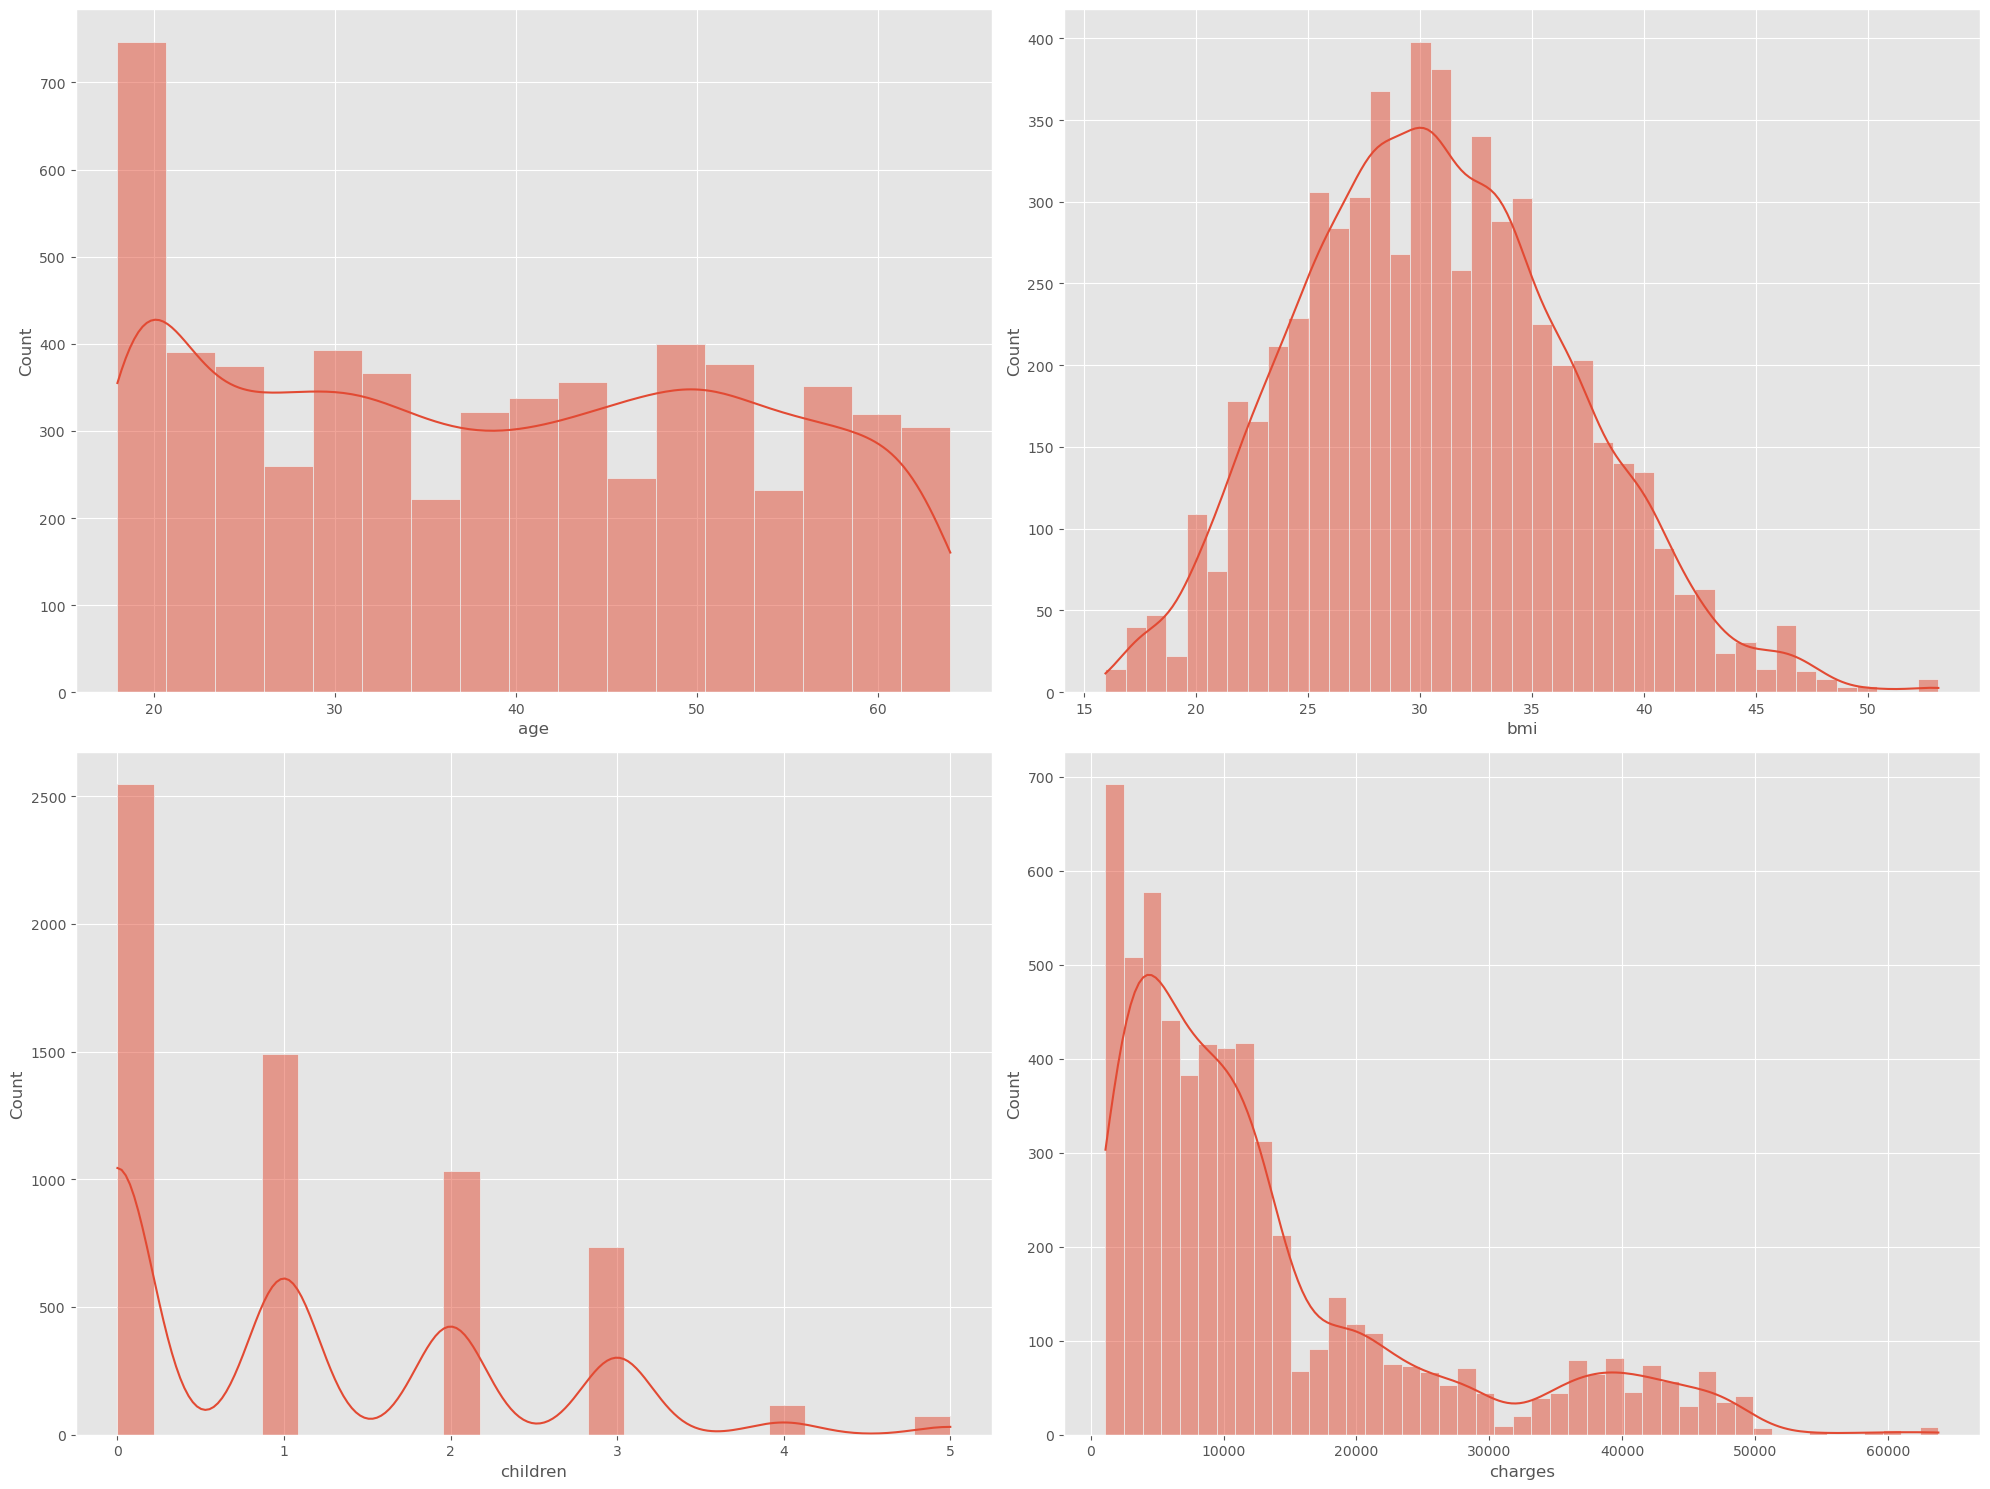

In [15]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)

plt.tight_layout()
plt.show()

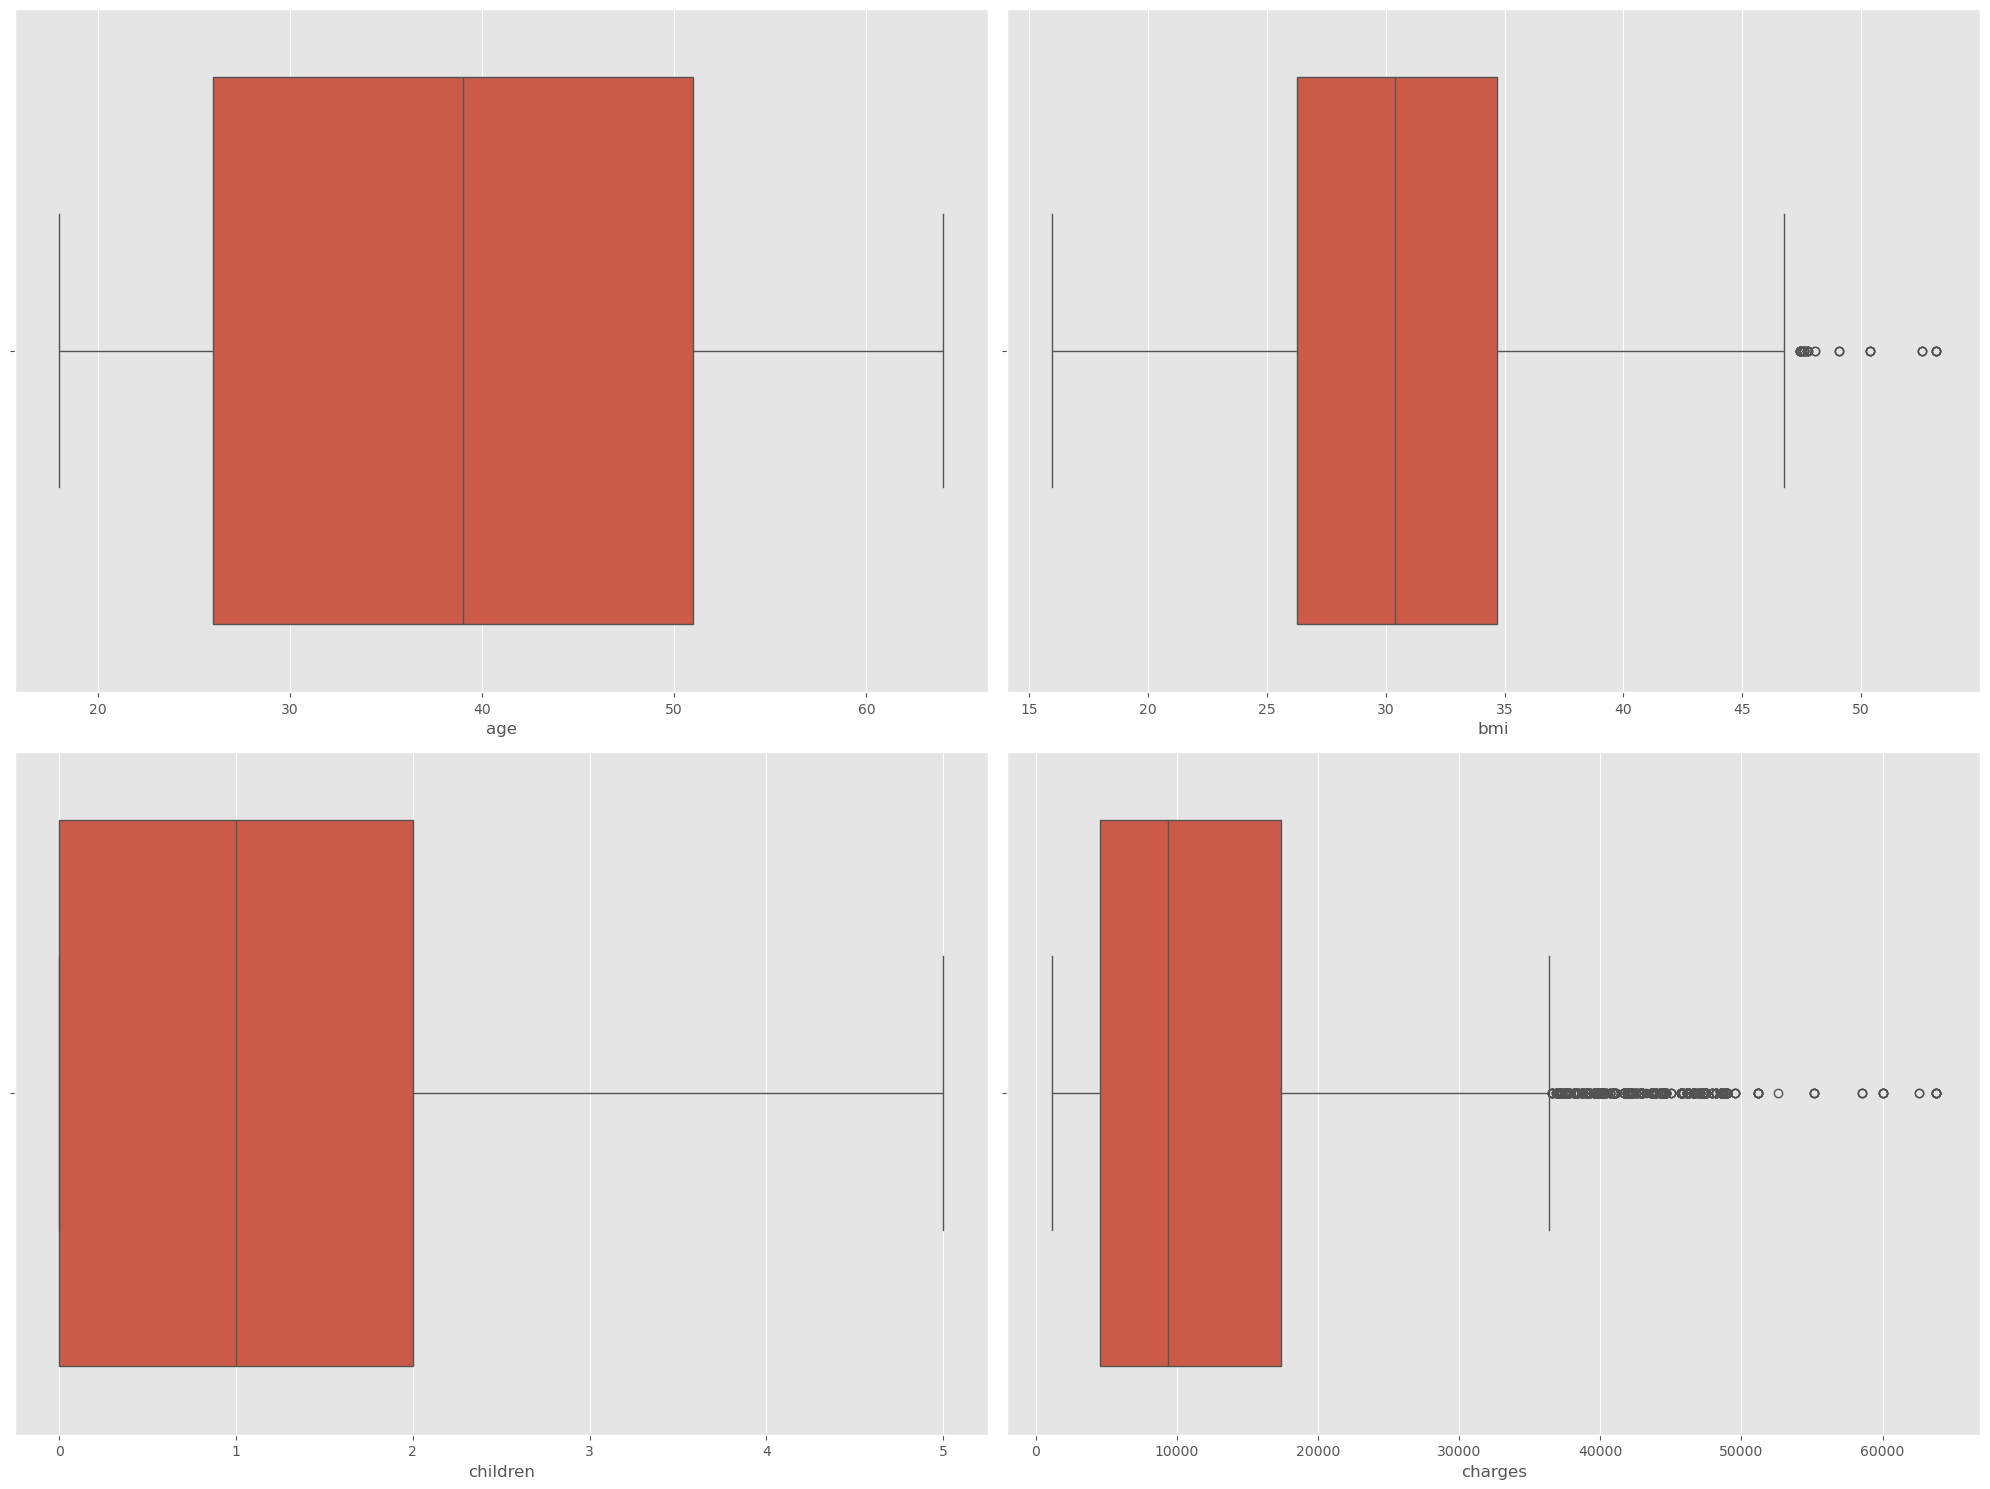

In [16]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()

for i , column in enumerate(num_features):
    ax = axes[i]
    sns.boxplot(data = df, x = df[column], ax=ax)

plt.tight_layout()
plt.show()

<Axes: >

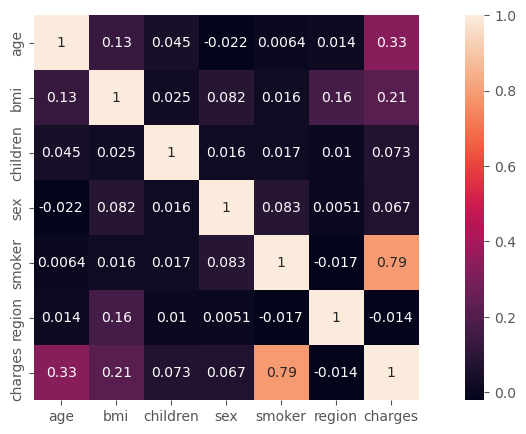

In [17]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr,annot = True, square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

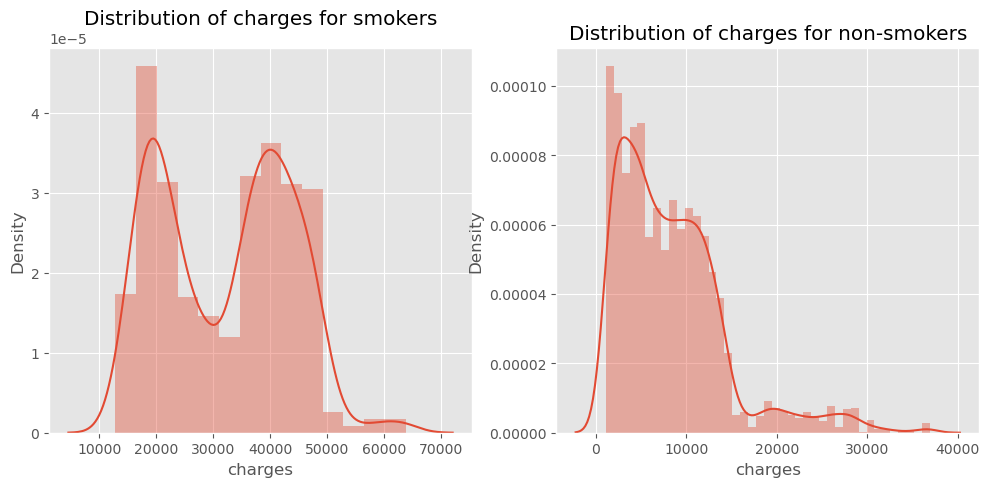

In [18]:
fig, axis = plt.subplots(nrows = 1, ncols = 2)
ax = axis.flatten()
sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
ax[0].set_title("Distribution of charges for smokers")
sns.distplot(df[df.smoker == 0]["charges"], ax = ax[1])
ax[1].set_title("Distribution of charges for non-smokers")

<Axes: xlabel='smoker', ylabel='count'>

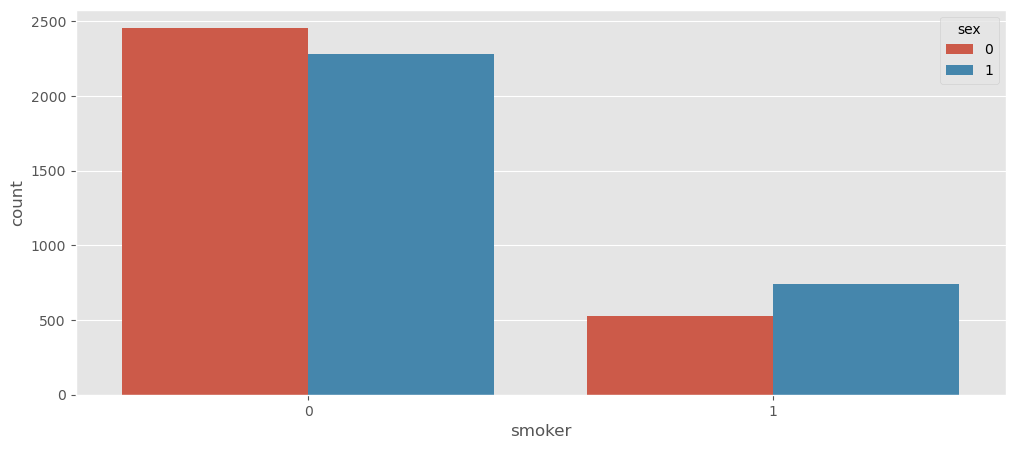

In [19]:
sns.countplot(data = df, x= 'smoker', hue = 'sex')

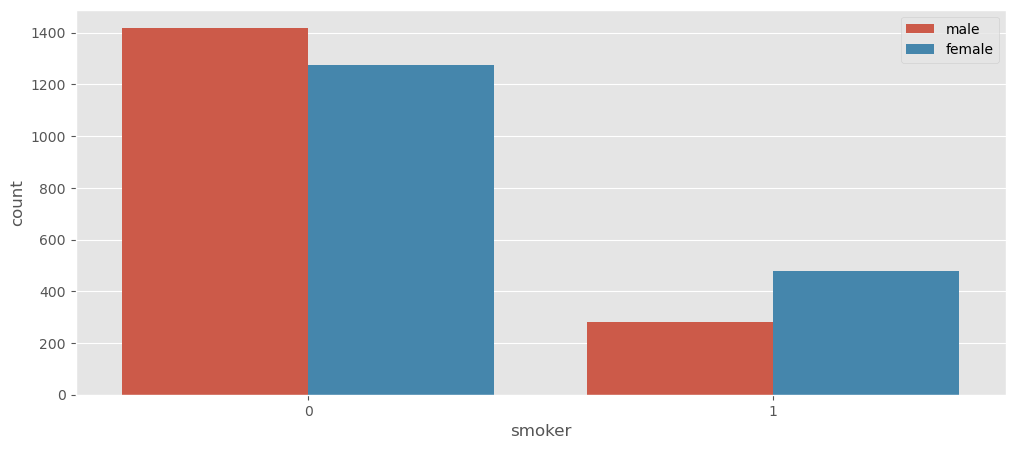

In [20]:
sns.countplot(data = df[df["children"] > 0], x = "smoker", hue = "sex" )
plt.legend({"male", "female"})

In [21]:
x = df.drop("charges", axis = 1)
y = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lr = LinearRegression().fit(x_train_scaled, y_train)

In [22]:
print(f'model accuracy on training set : {lr.score(x_train_scaled, y_train)}')
print(f'modle accuracy on test set : {lr.score(x_test_scaled, y_test)}')

model accuracy on training set : 0.7577973983087309
modle accuracy on test set : 0.7544088443018817


In [23]:
pf = PolynomialFeatures(degree = 3)
x_train_quad = pf.fit_transform(x_train_scaled)
x_test_quad = pf.transform(x_test_scaled)

lr_pf = LinearRegression().fit(x_train_quad, y_train)

In [24]:
print(f'model accuracy on training set : {lr_pf.score(x_train_quad, y_train)}')
print(f'modle accuracy on test set : {lr_pf.score(x_test_quad, y_test)}')

model accuracy on training set : 0.8588002915101276
modle accuracy on test set : 0.8602999306722767


In [25]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              max_depth= 4,
                              random_state = 42,
                              n_jobs = -1)
forest.fit(x_train_scaled, y_train)
forest_train_pred = forest.predict(x_train_scaled)
forest_test_pred = forest.predict(x_test_scaled)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 17810263.976, MSE test data: 18554832.067
R2 train data: 0.881, R2 test data: 0.884


In [26]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

# Initialize the RandomForestRegressor
RFR = rfr(n_estimators=100, criterion='squared_error', random_state=0, n_jobs=-1)
RFR.fit(x_train, y_train)

# Predictions
x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

In [27]:
print('Model Accuracy Score: {:.2f}%'.format(RFR.score(x_test,y_test)))

Model Accuracy Score: 0.98%
